<a href="https://colab.research.google.com/github/jvmorenot1/Muestras_/blob/main/Copia_de_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [ ]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./listings(1).csv.gz")

In [ ]:
# Showing dataframe dimensions
listings_df.shape

(26318, 75)

In [ ]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [ ]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3388,22341901,https://www.airbnb.com/rooms/22341901,20230922223244,2023-09-23,city scrape,Rental unit in Mexico City · ★4.33 · 2 bedroom...,Beautiful two bedrooms flat (98 square meters)...,The apartment is located in a residential zone...,https://a0.muscache.com/pictures/980b13e7-788c...,4362310,https://www.airbnb.com/users/show/4362310,Aarón,2012-12-09,"Mexico City, Mexico","I´m an easy going person that loves music, spo...",NaN,NaN,NaN,NaN,https://a0.muscache.com/im/users/4362310/profi...,https://a0.muscache.com/im/users/4362310/profi...,NaN,37,67,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Benito Juárez,NaN,19.37222,-99.16823,Entire rental unit,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Smoke alarm"", ""Ethernet connection"", ""Refrig...",$911.00,2,185,2,2,185,185,2.0,185.0,NaN,t,0,0,0,234,2023-09-23,9,0,0,2018-12-24,2021-03-13,4.33,4.00,4.00,4.78,4.11,4.56,4.00,NaN,f,30,27,3,0,0.16
9154,43884149,https://www.airbnb.com/rooms/43884149,20230922223244,2023-09-23,city scrape,Home in Centro · ★4.74 · 1 bedroom · 2 beds · ...,"Hermoso depto, dentro de una privada de casas...",Muy céntrico y colorido para todos los que gus...,https://a0.muscache.com/pictures/ffed4ecd-32bd...,36584904,https://www.airbnb.com/users/show/36584904,Ericka,2015-06-24,"Mexico City, Mexico","Soy mercadologa, me gusta practicar diferentes...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/697d7...,https://a0.muscache.com/im/pictures/user/697d7...,Colonia Centro,3,7,"['email', 'phone']",t,t,"Centro, Ciudad de México, Mexico",Cuauhtémoc,NaN,19.42935,-99.14430,Entire home,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Refrigerator"", ""First aid kit"", ""Cooking bas...",$479.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,6,19,28,273,2023-09-23,58,33,3,2021-01-20,2023-09-06,4.74,4.76,4.48,4.97,4.88,4.90,4.84,NaN,f,3,3,0,0,1.78
5481,31832040,https://www.airbnb.com/rooms/31832040,20230922223244,2023-09-24,city scrape,Home in Mexico City · 5 bedrooms · 5 beds · 2 ...,una habitación sencilla con todo lko necesario...,NaN,https://a0.muscache.com/pictures/75ea3b77-37c5...,85979086,https://www.airbnb.com/users/show/85979086,Izadora,2016-07-25,"Mexico City, Mexico",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7c776...,https://a0.muscache.com/im/pictures/user/7c776...,NaN,3,6,"['email', 'phone']",t,t,NaN,Iztacalco,NaN,19.40179,-99.13371,Private room in home,Private room,2,NaN,2 baths,NaN,5.0,"[""Refrigerator"", ""Long term stays allowed"", ""E...","$3,750.00",2,37,2,2,37,37,2.0,37.0,NaN,t,30,60,90,365,2023-09-24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
8349,41589332,https://www.airbnb.com/rooms/4

## 2. Univariate analysis

In [ ]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()

26318

In [ ]:
# Showing unique values of neighbourhoods
listings_df["neighbourhood_cleansed"].unique()

array(['Cuajimalpa de Morelos', 'Cuauhtémoc', 'Álvaro Obregón',
       'Coyoacán', 'Miguel Hidalgo', 'Venustiano Carranza',
       'Benito Juárez', 'La Magdalena Contreras', 'Iztacalco', 'Tlalpan',
       'Gustavo A. Madero', 'Xochimilco', 'Iztapalapa', 'Azcapotzalco',
       'Tláhuac', 'Milpa Alta'], dtype=object)

In [ ]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Entire home/apt    0.653431
Private room       0.329280
Shared room        0.013147
Hotel room         0.004142
Name: room_type, dtype: float64

In [ ]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    26318.000000
mean         3.323581
std          2.276381
min          1.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          7.000000
max         16.000000
Name: accommodates, dtype: float64

<span style="color: red;">What does it means the value of 0 for this attribute?</span>

In [ ]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

[]

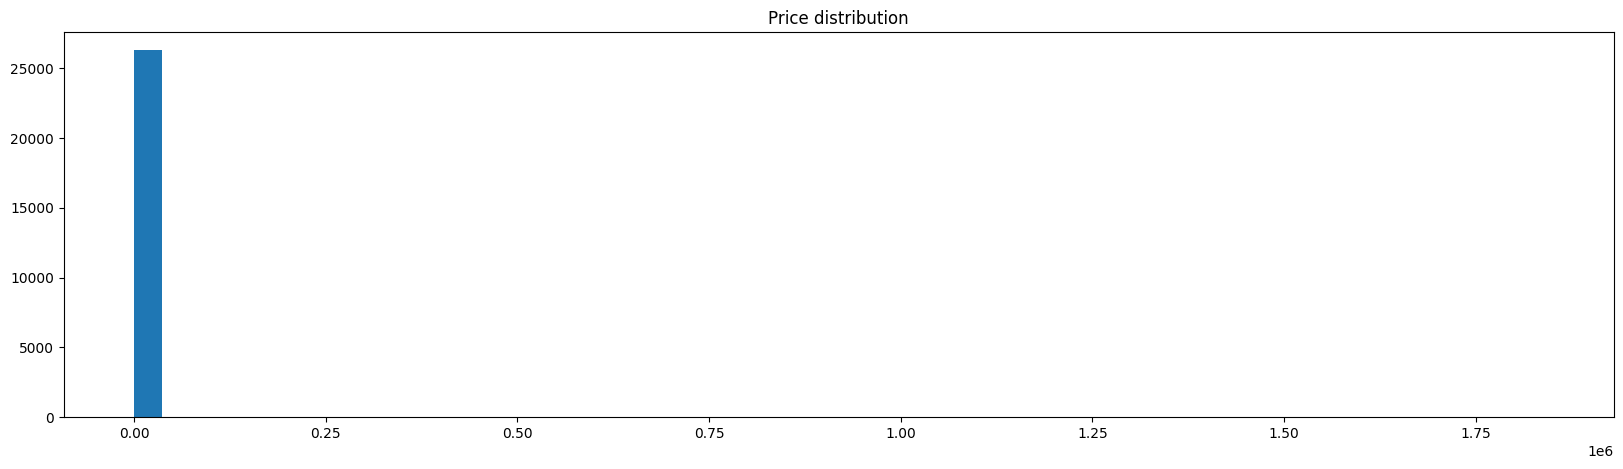

In [ ]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has a extreme outlier making difficult a proper visualization?</span>

In [ ]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

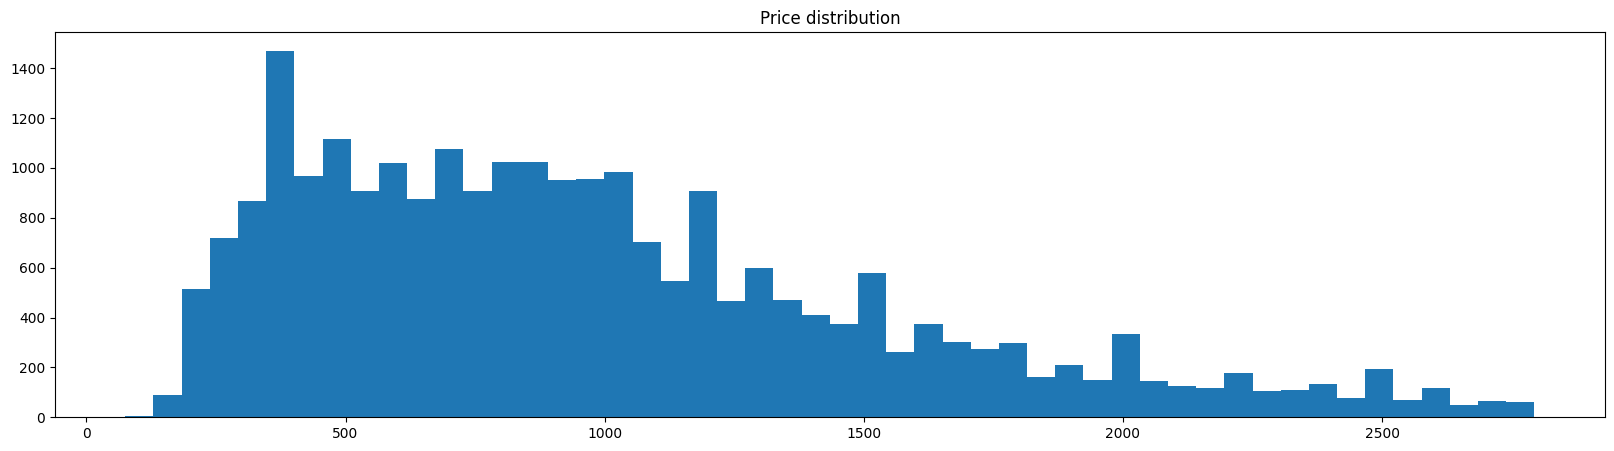

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

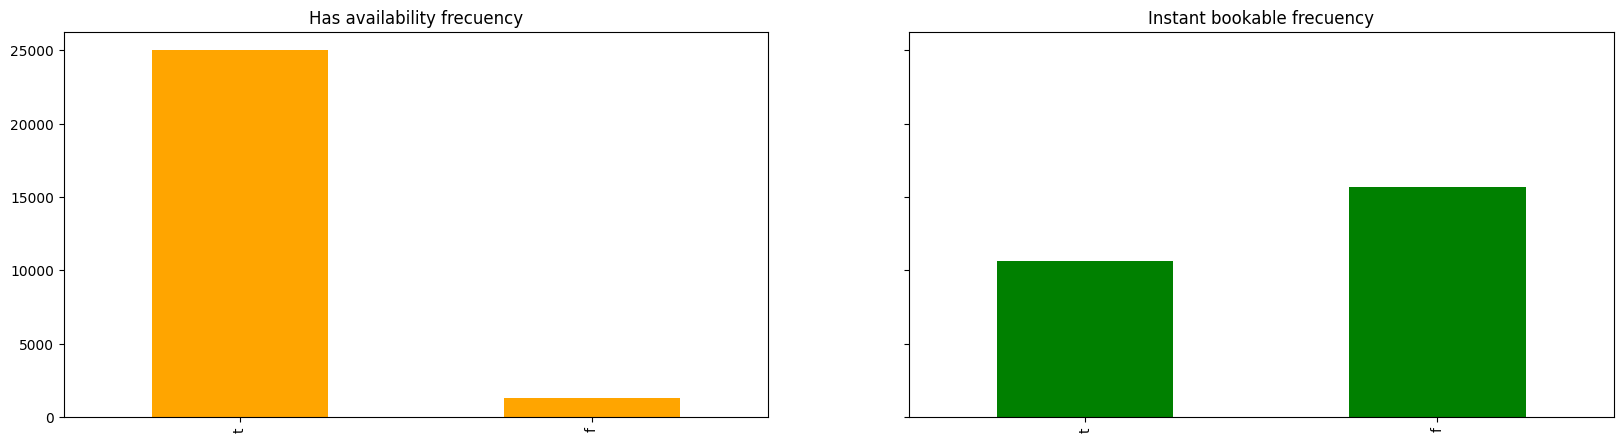

In [ ]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

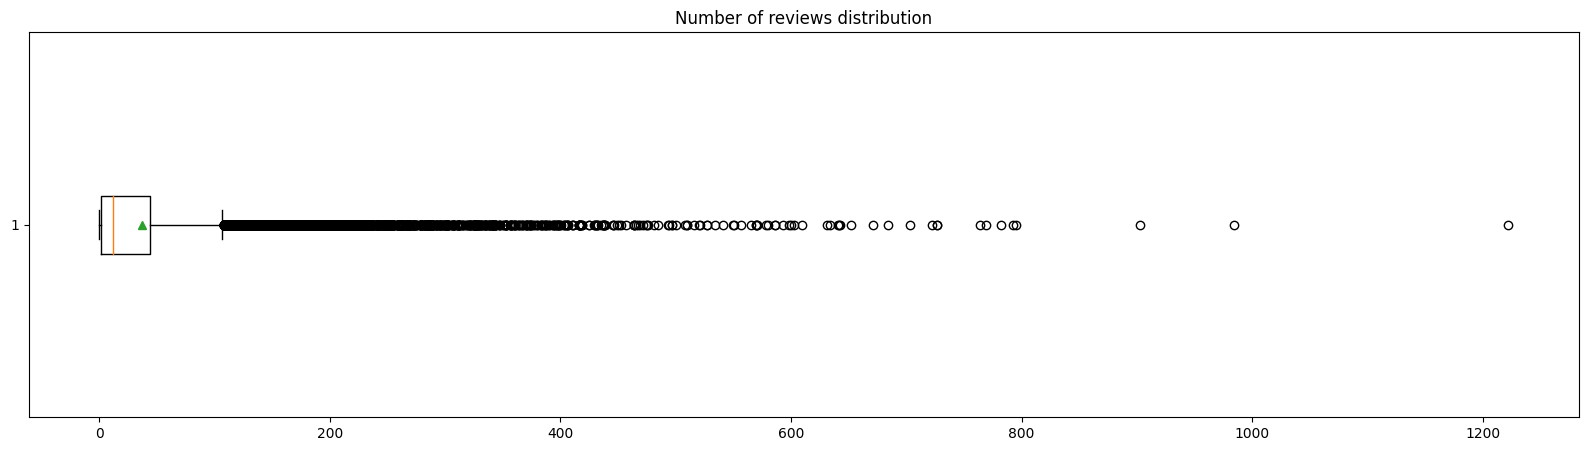

In [ ]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

## 2. Bivariate analysis

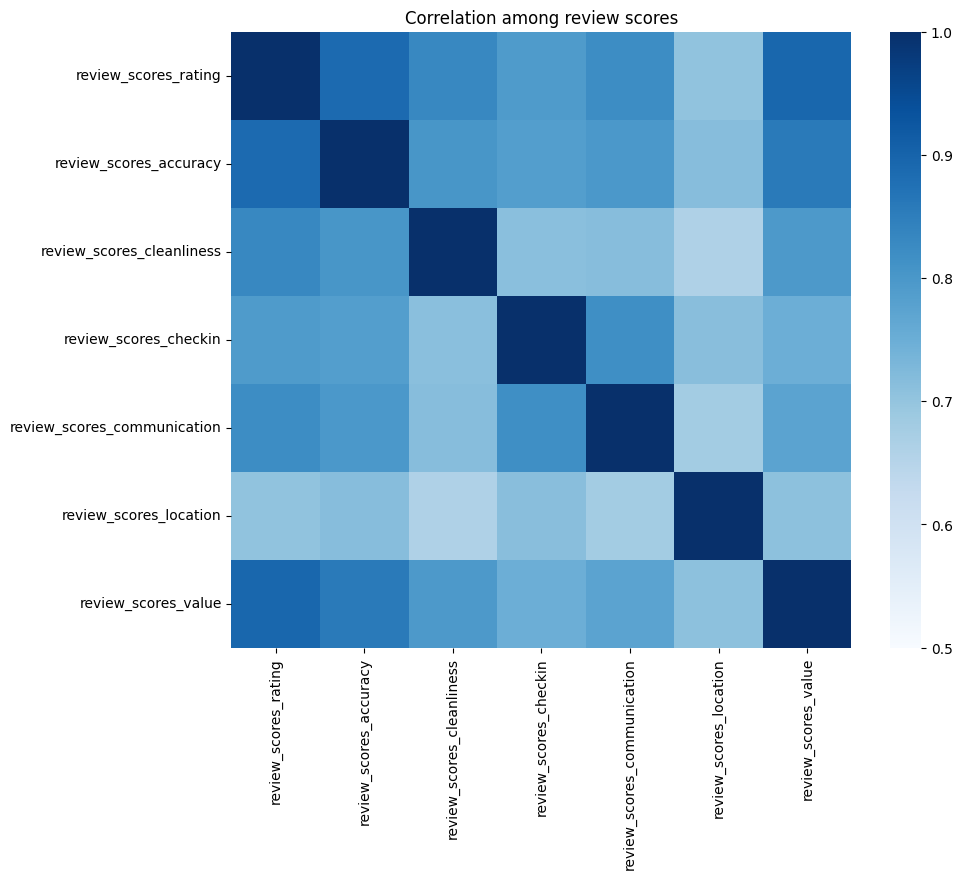

In [ ]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [ ]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(2442, 76)

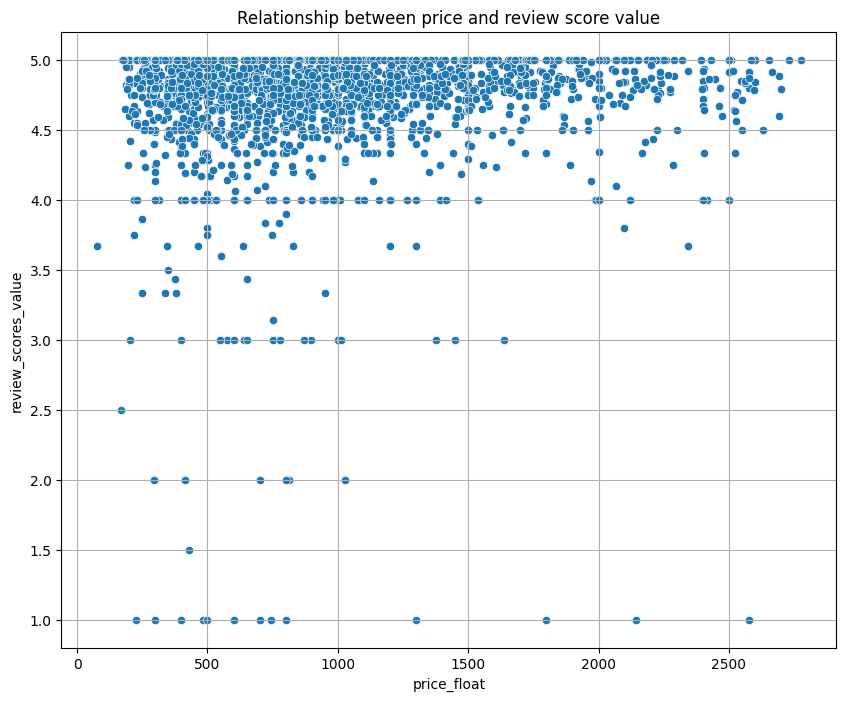

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

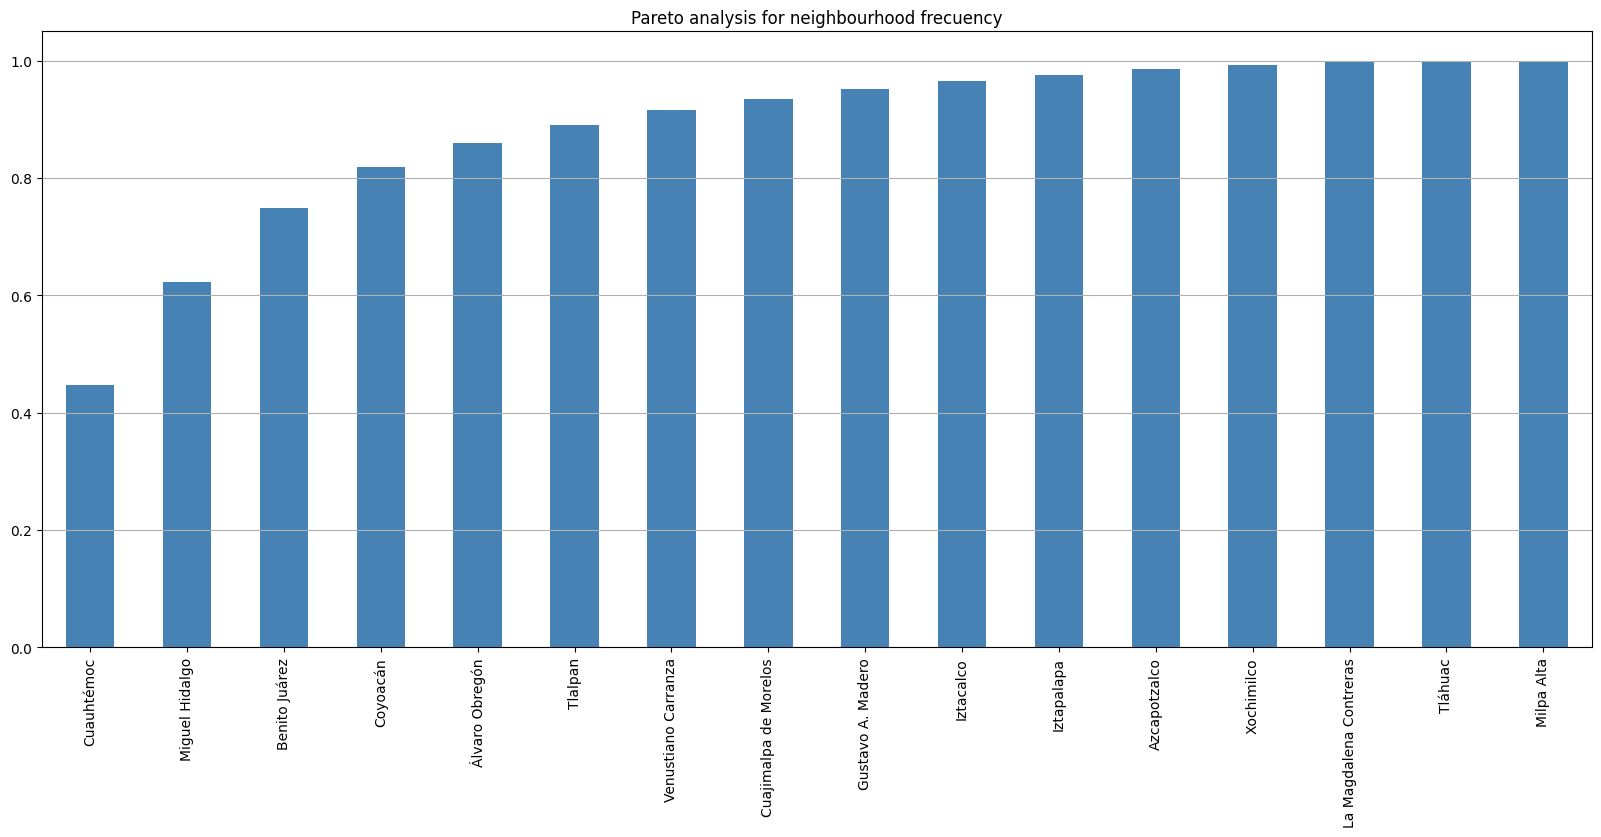

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez']

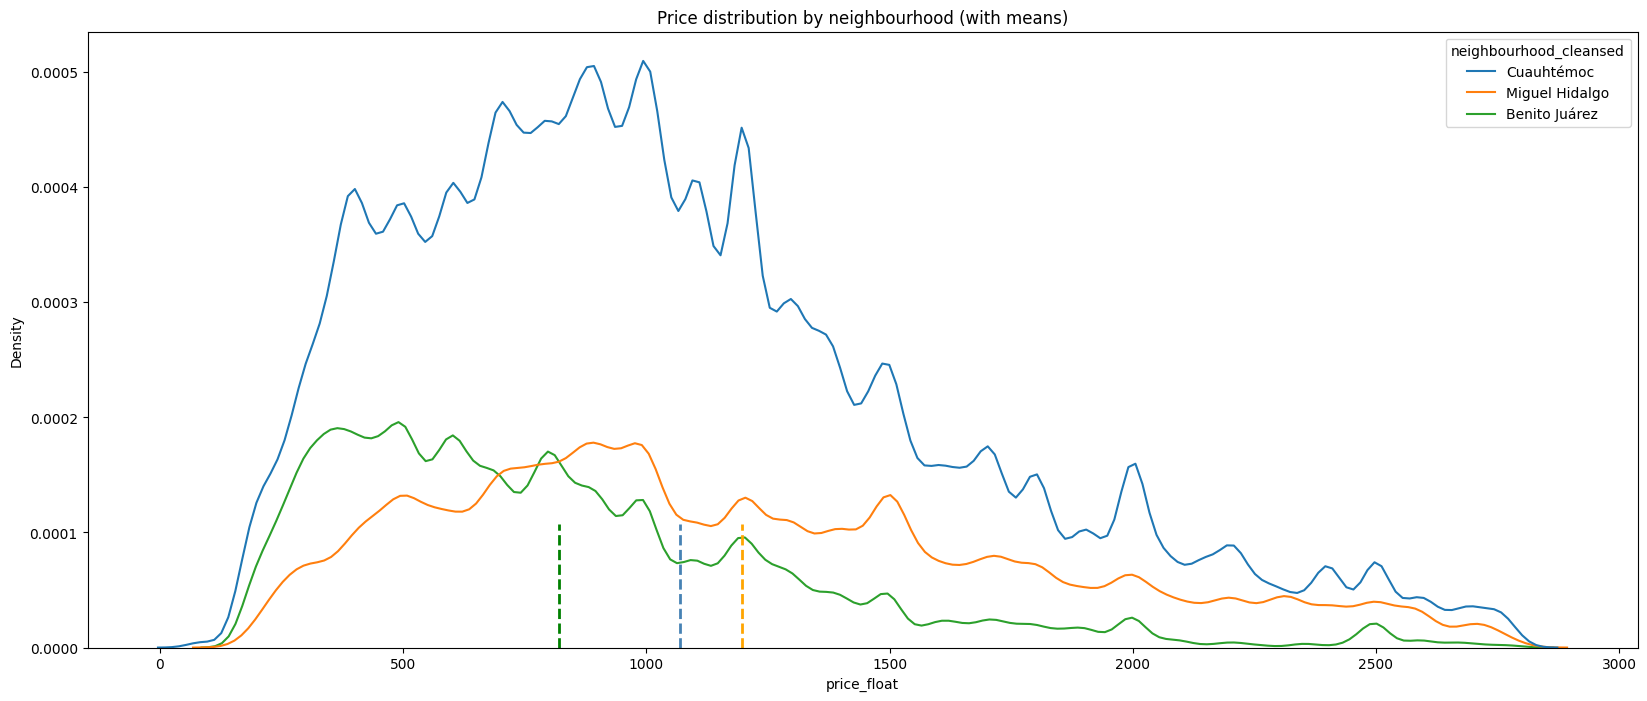

In [ ]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

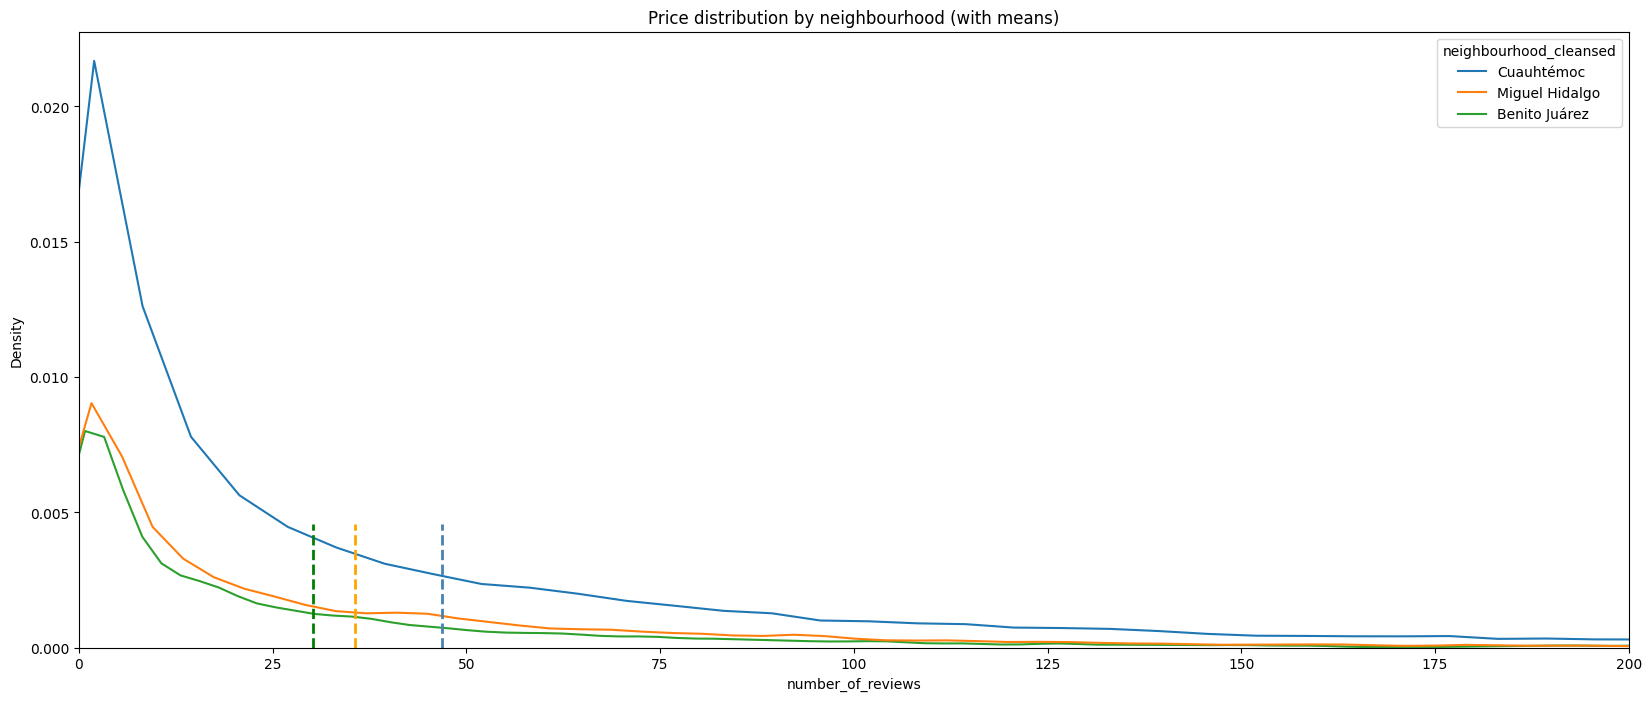

In [ ]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()